#### Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Input, Dropout, LeakyReLU, BatchNormalization

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
school_data = pd.read_csv("updated_dataset.csv")

In [5]:
school_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Total Curricular Units 1st Semester,Total Curricular Units 2nd Semester,Total Credits Earned,Total Units Enrolled,Weighted Grade 1st Semester,Weighted Grade 2nd Semester,GPA
0,0,7,0.441833,1,1,0,0.351853,0,12,9,5,9,0.431185,1,0,0,1,1,0,0.055060,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0,5,0.105361,10,1,0,0.847053,0,0,2,3,3,0.634096,1,0,0,0,1,0,0.037041,0,0.0,0.207639,0.133333,0.230769,0.554311,0.0,0.0,0.26087,0.181818,0.30,0.551906,0.0,0.732558,0.111111,0.640687,2,0.207639,0.231802,0.0,0.399875,0.0,0.0,0.0
2,0,0,0.441833,4,1,0,0.351853,0,21,26,9,9,0.397812,1,0,0,0,1,0,0.037041,0,0.0,0.207639,0.000000,0.000000,0.000000,0.0,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0,0.207639,0.231802,0.0,0.399875,0.0,0.0,0.0
3,0,7,0.200671,14,1,0,0.351853,0,22,26,5,3,0.328395,1,0,0,1,0,0,0.055060,0,0.0,0.207639,0.177778,0.230769,0.535905,0.0,0.0,0.26087,0.303030,0.25,0.510826,0.0,0.209302,0.000000,0.124174,2,0.207639,0.231802,0.0,0.399875,0.0,0.0,0.0
4,1,11,0.105361,2,0,0,0.065158,0,21,27,9,9,0.620746,0,0,0,1,0,0,0.424157,0,0.0,0.207639,0.200000,0.192308,0.501256,0.0,0.0,0.26087,0.181818,0.30,0.529996,0.0,0.732558,0.111111,0.640687,2,0.207639,0.231802,0.0,0.399875,0.0,0.0,0.0


#### Data Splitting and Baseline Model

In [6]:
X = school_data[['Previous qualification (grade)','Debtor','Tuition fees up to date',"Educational special needs", 'Scholarship holder', 'International',
       'Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)','Curricular units 1st sem (without evaluations)','Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)','Curricular units 2nd sem (grade)',
        'Age at enrollment']]

y = school_data["Target"]

##### - Split data into training, validation, and test sets

In [7]:
# Split the data into training, validation, and test sets (60% train, 20% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

##### - A simple baseline model (Logistic Regression)

In [8]:
# Train a simple logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

##### - Evaluate baseline model performance

In [9]:
# Make predictions on validation data
y_val_pred = lr_model.predict(X_val)
# Evaluate model performance
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Logistic Accuracy: {val_accuracy:.4f}')

Logistic Accuracy: 0.7525


#### Traditional Machine Learning Models

##### - Decision Trees

In [10]:
# Train a decision tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

##### - Random Forests

In [11]:
# Train a random forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##### - Support Vector Machines

In [12]:
# Train an SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

##### - Gradient Boosting Machines (XGBoost)

In [13]:
# Train an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

##### - Evaluate and compare model performances

In [14]:
# Decision Tree
y_pred_dt = dt_model.predict(X_val)
dt_accuracy = accuracy_score(y_val, y_pred_dt)
print(f'Decision Tree Accuracy: {dt_accuracy:.4f}')

# Random Forest
y_pred_rf = rf_model.predict(X_val)
rf_accuracy = accuracy_score(y_val, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')

# Support Vector Machine
y_pred_svm = svm_model.predict(X_val)
svm_accuracy = accuracy_score(y_val, y_pred_svm)
print(f'SVM Accuracy: {svm_accuracy:.4f}')

# XGBoost
y_pred_xgb = xgb_model.predict(X_val)
xgb_accuracy = accuracy_score(y_val, y_pred_xgb)
print(f'XGBoost Accuracy: {xgb_accuracy:.4f}')

Decision Tree Accuracy: 0.6565
Random Forest Accuracy: 0.7492
SVM Accuracy: 0.7277
XGBoost Accuracy: 0.7412


#### Deep Learning Models

##### - Design and implement a neural network architecture (Single Layer)

In [15]:
# Define the model architecture
sl_model = Sequential()

sl_model.add(Input(shape=(X_train.shape[1],)))

# Hidden layer
sl_model.add(Dense(32, activation='relu'))

# Output layer (using sigmoid activation for binary classification)
sl_model.add(Dense(1, activation='sigmoid'))

In [16]:
# Compile the model
sl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# View the model summary
sl_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

##### - Train the neural network

In [18]:
# Train the model
history_sl = sl_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2036 - loss: 0.4208 - val_accuracy: 0.1876 - val_loss: -0.2258
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1795 - loss: -0.5475 - val_accuracy: 0.1876 - val_loss: -1.0365
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1781 - loss: -1.4590 - val_accuracy: 0.1944 - val_loss: -2.0722
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1896 - loss: -2.9391 - val_accuracy: 0.2034 - val_loss: -3.5521
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1937 - loss: -4.6415 - val_accuracy: 0.2045 - val_loss: -5.5037
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1854 - loss: -7.3118 - val_accuracy: 0.2045 - val_loss: -7.9007
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1952 - loss: -9.5325 - val_accuracy: 0.2045 - val_loss: -10.7794
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1941 - loss: -13.1945 - val_accuracy: 0.

In [19]:
# Evaluate on validation data
nn_loss, nn_accuracy = sl_model.evaluate(X_val, y_val)
print(f'Neural Network Accuracy: {nn_accuracy:.4f}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2163 - loss: -519.9688 
Neural Network Accuracy: 0.2079


##### Experiment with different architectures
##### - Deep Neural Network (Multiple Hidden Layers)

In [20]:
# Deep Neural Network (Multiple Hidden Layers)
ml_model = Sequential()

ml_model.add(Input(shape=(X_train.shape[1],)))

# First hidden layer (64 neurons)
ml_model.add(Dense(64, activation='relu'))

# Second hidden layer (32 neurons)
ml_model.add(Dense(32, activation='relu'))

# Output layer (binary classification)
ml_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ml_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# View the model summary
ml_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the model
history_ml = ml_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1799 - loss: -0.1449 - val_accuracy: 0.1876 - val_loss: -2.6187
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1660 - loss: -6.6209 - val_accuracy: 0.1876 - val_loss: -21.6018
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1791 - loss: -39.6103 - val_accuracy: 0.1876 - val_loss: -83.6811
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1851 - loss: -126.6430 - val_accuracy: 0.1898 - val_loss: -213.0264
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1763 - loss: -318.0934 - val_accuracy: 0.1932 - val_loss: -436.3010
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1901 - loss: -602.3250 - val_accuracy: 0.1932 - val_loss: -766.2686
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1865 - loss: -991.1417 - val_accuracy: 0.1932 - val_loss: -1231.9088
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1751 - loss: -1542.7

In [22]:
# Evaluate on validation data
nn_loss, nn_accuracy = ml_model.evaluate(X_val, y_val)
print(f'Neural Network Accuracy: {nn_accuracy:.4f}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2067 - loss: -270669.7500
Neural Network Accuracy: 0.1955


##### - Neural Network with Dropout for Regularization

In [23]:
# Neural Network with Dropout
nd_model = Sequential()

nd_model.add(Input(shape=(X_train.shape[1],)))

# First hidden layer (64 neurons) with dropout
nd_model.add(Dense(64, activation='relu'))
nd_model.add(Dropout(0.5))  # Drop 50% of the neurons randomly

# Second hidden layer (32 neurons) with dropout
nd_model.add(Dense(32, activation='relu'))
nd_model.add(Dropout(0.5))

# Output layer (binary classification)
nd_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nd_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# View the model summary
nd_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Train the model
history_nd = nd_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2452 - loss: 0.6542 - val_accuracy: 0.1876 - val_loss: -0.6986
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1735 - loss: -1.8318 - val_accuracy: 0.1876 - val_loss: -6.5940
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1869 - loss: -12.5105 - val_accuracy: 0.1876 - val_loss: -31.6923
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1746 - loss: -55.5047 - val_accuracy: 0.1876 - val_loss: -90.9643
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1814 - loss: -135.1869 - val_accuracy: 0.1876 - val_loss: -198.7148
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1830 - loss: -277.9479 - val_accuracy: 0.1876 - val_loss: -376.0509
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1765 - loss: -502.8527 - val_accuracy: 0.1876 - val_loss: -637.7542
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1855 - loss: -869.9669 - 

In [25]:
# Evaluate on validation data
nn_loss, nn_accuracy = nd_model.evaluate(X_val, y_val)
print(f'Neural Network Accuracy: {nn_accuracy:.4f}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2094 - loss: -177806.9688
Neural Network Accuracy: 0.2000


##### - Neural Network with Different Activation Functions

In [26]:
# Neural Network with Leaky ReLU and tanh activation
na_model = Sequential()

na_model.add(Input(shape=(X_train.shape[1],)))

# First hidden layer (64 neurons) with LeakyReLU activation
na_model.add(Dense(64))
na_model.add(LeakyReLU(negative_slope=0.1))

# Second hidden layer (32 neurons) with tanh activation
na_model.add(Dense(32, activation='tanh'))

# Output layer (binary classification)
na_model.add(Dense(1, activation='sigmoid'))

# Compile the model
na_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# View the model summary
na_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Train the model
history_na = na_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1865 - loss: -0.0830 - val_accuracy: 0.1876 - val_loss: -1.5883
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1857 - loss: -2.5279 - val_accuracy: 0.2780 - val_loss: -3.1812
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2831 - loss: -3.9857 - val_accuracy: 0.3424 - val_loss: -4.7228
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3391 - loss: -5.4397 - val_accuracy: 0.3559 - val_loss: -6.0764
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3363 - loss: -7.3849 - val_accuracy: 0.3684 - val_loss: -7.3384
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3523 - loss: -8.5644 - val_accuracy: 0.3684 - val_loss: -8.5800
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3433 - loss: -10.1081 - val_accuracy: 0.3706 - val_loss: -9.7790
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3593 - loss: -10.6121 - val_accuracy: 0

In [28]:
# Evaluate on validation data
nn_loss, nn_accuracy = na_model.evaluate(X_val, y_val)
print(f'Neural Network Accuracy: {nn_accuracy:.4f}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3761 - loss: -56.6712
Neural Network Accuracy: 0.3864


##### - Neural Network with Batch Normalization

In [29]:
# Neural Network with Batch Normalization
nb_model = Sequential()

nb_model.add(Input(shape=(X_train.shape[1],)))

# First hidden layer (64 neurons) with batch normalization
nb_model.add(Dense(64))
nb_model.add(BatchNormalization())  # Batch normalization layer
nb_model.add(LeakyReLU(negative_slope=0.1))  # Leaky ReLU after normalization

# Second hidden layer (32 neurons) with batch normalization
nb_model.add(Dense(32))
nb_model.add(BatchNormalization())
nb_model.add(LeakyReLU(negative_slope=0.1))

# Output layer (binary classification)
nb_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nb_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# View the model summary
nb_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,777 (14.75 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 192 (768.00 B)

In [30]:
# Train the model
history_nb = nb_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2970 - loss: -0.3668 - val_accuracy: 0.2260 - val_loss: -0.5272
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3605 - loss: -2.0203 - val_accuracy: 0.2949 - val_loss: -1.5103
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3790 - loss: -3.8882 - val_accuracy: 0.3627 - val_loss: -3.5049
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3472 - loss: -6.6368 - val_accuracy: 0.3729 - val_loss: -5.2558
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3654 - loss: -9.5635 - val_accuracy: 0.3831 - val_loss: -8.7591
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3484 - loss: -12.7181 - val_accuracy: 0.3853 - val_loss: -12.8920
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3473 - loss: -17.3569 - val_accuracy: 0.3842 - val_loss: -16.7307
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3622 - loss: -21.7670 - val_accuracy

In [31]:
# Evaluate on validation data
nn_loss, nn_accuracy = nb_model.evaluate(X_val, y_val)
print(f'Neural Network Accuracy: {nn_accuracy:.4f}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3823 - loss: -589.3706
Neural Network Accuracy: 0.3910


#### Model Evaluation and Comparison

##### - Cross-validation for machine learning models

In [32]:
# Logistic Regression
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Logistic Regression CV Accuracy: {lr_cv_scores.mean():.4f}')

# Decision Trees
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Decision Trees CV Accuracy: {dt_cv_scores.mean():.4f}')

# Random Forests
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Random Forests CV Accuracy: {rf_cv_scores.mean():.4f}')

# Support Vector Machines
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Support Vector Machines CV Accuracy: {svm_cv_scores.mean():.4f}')

# XGBoost
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'XGBoost CV Accuracy: {xgb_cv_scores.mean():.4f}')

Logistic Regression CV Accuracy: 0.7577
Decision Trees CV Accuracy: 0.6797
Random Forests CV Accuracy: 0.7690
Support Vector Machines CV Accuracy: 0.7476
XGBoost CV Accuracy: 0.7540


##### - Cross-validation for deep learning models

In [33]:
def evaluate_model(model, X_train, y_train):
    # Set up K-Fold Cross-Validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Placeholder to store accuracy for each fold
    accuracies = []
    history_list = []

    # Loop over each fold
    for train_index, val_index in kfold.split(X_train):
        # Split data into train and validation sets for this fold
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train the model
        history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0)

        # Evaluate the model on the validation fold
        scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
        
        accuracies.append(scores[1] * 100)
        history_list.append(history)

    # Calculate and return average performance across folds
    average_accuracy = np.mean(accuracies)
    return average_accuracy

# List of models to evaluate
models = {
    'Single Layer': sl_model,
    'Multiple Layer': ml_model,
    'Neural Network with Dropout': nd_model,
    'Neural Network with Leaky ReLU and tanh activation': na_model,
    'Neural Network with Batch Normalization': nb_model,
}

# Evaluate each model and print the results
for model_name, model in models.items():
    avg_accuracy = evaluate_model(model, X_train, y_train)
    print(f'{model_name} Validation Accuracy: {avg_accuracy:.2f}%')


Single Layer Validation Accuracy: 19.10%
Multiple Layer Validation Accuracy: 18.31%
Neural Network with Dropout Validation Accuracy: 18.65%
Neural Network with Leaky ReLU and tanh activation Validation Accuracy: 36.59%
Neural Network with Batch Normalization Validation Accuracy: 35.15%


##### - Machine Learning Models Comparison using appropriate metrics

In [34]:
# Initialize dictionaries to hold model performances
model_performance = {}

# Evaluate Logistic Regression
y_test_pred = lr_model.predict(X_test)
model_performance['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred, average='weighted'), 
    'Recall': recall_score(y_test, y_test_pred, average='weighted'),  
    'F1-Score': f1_score(y_test, y_test_pred, average='weighted'), 
    'ROC-AUC': roc_auc_score(y_test, lr_model.predict_proba(X_test), multi_class='ovr')  
}

# Evaluate Decision Tree
test_pred_dt = dt_model.predict(X_test)
model_performance['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, test_pred_dt),
    'Precision': precision_score(y_test, test_pred_dt, average='weighted'),  
    'Recall': recall_score(y_test, test_pred_dt, average='weighted'), 
    'F1-Score': f1_score(y_test, test_pred_dt, average='weighted'), 
    'ROC-AUC': roc_auc_score(y_test, dt_model.predict_proba(X_test), multi_class='ovr')  
}

# Evaluate Random Forest
test_pred_rf = rf_model.predict(X_test)
model_performance['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, test_pred_rf),
    'Precision': precision_score(y_test, test_pred_rf, average='weighted'),  
    'Recall': recall_score(y_test, test_pred_rf, average='weighted'),  
    'F1-Score': f1_score(y_test, test_pred_rf, average='weighted'), 
    'ROC-AUC': roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr')  
}

# Evaluate Support Vector Machines
test_pred_svm = svm_model.predict(X_test)
model_performance['Support Vector Machines'] = {
    'Accuracy': accuracy_score(y_test, test_pred_svm),
    'Precision': precision_score(y_test, test_pred_svm, average='weighted'),  
    'Recall': recall_score(y_test, test_pred_svm, average='weighted'),  
    'F1-Score': f1_score(y_test, test_pred_svm, average='weighted'),  
    'ROC-AUC': roc_auc_score(y_test, svm_model.predict_proba(X_test), multi_class='ovr')  
}

# Evaluate XGBoost
test_pred_xgb = xgb_model.predict(X_test)
model_performance['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, test_pred_xgb),
    'Precision': precision_score(y_test, test_pred_xgb, average='weighted'),  
    'Recall': recall_score(y_test, test_pred_xgb, average='weighted'), 
    'F1-Score': f1_score(y_test, test_pred_xgb, average='weighted'),  
    'ROC-AUC': roc_auc_score(y_test, xgb_model.predict_proba(X_test), multi_class='ovr') 
}

# Create a DataFrame to compare the performances
performance_df = pd.DataFrame(model_performance).T
print(performance_df)


                         Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression      0.760452   0.743781  0.760452  0.743407  0.875942
Decision Tree            0.696045   0.699320  0.696045  0.697270  0.738899
Random Forest            0.767232   0.752062  0.767232  0.753082  0.873943
Support Vector Machines  0.749153   0.736490  0.749153  0.735353  0.876167
XGBoost                  0.771751   0.758692  0.771751  0.762171  0.872406


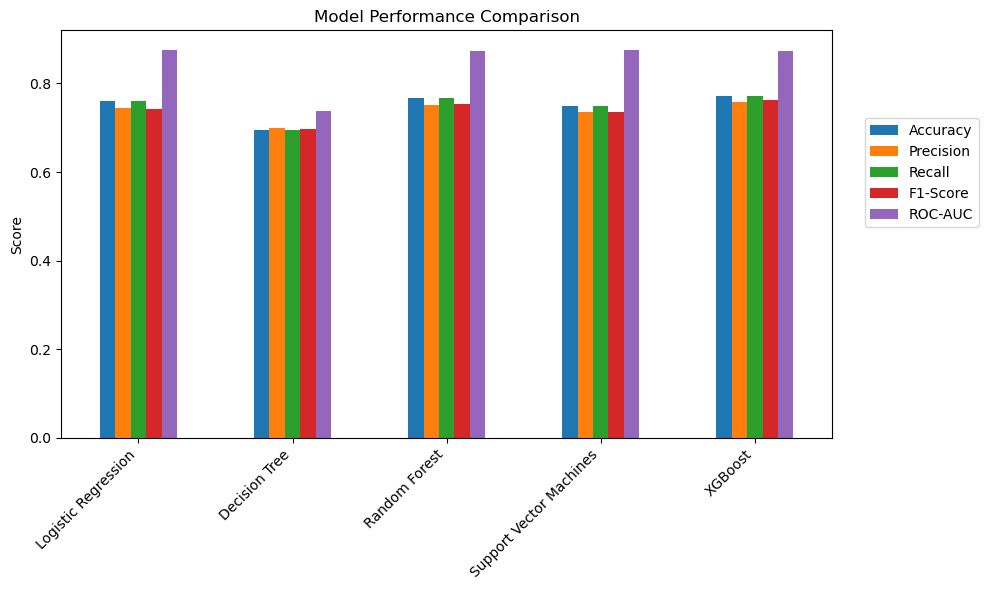

In [35]:
# Plot the performance metrics
performance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0.5))
plt.tight_layout()

# Show the plot
plt.savefig("ML Comaprison.png")
plt.show()

##### - Deep Learning Models Comparison using appropriate metrics

In [36]:
# Function to evaluate each model and calculate the required metrics
def evaluate_model(model, X_val, y_val):
    # Evaluate accuracy
    accuracy = model.evaluate(X_val, y_val, verbose=0)[1]
    
    # Get predictions (for multiclass classification)
    predictions = model.predict(X_val)
    
    # For multiclass, use argmax to get the predicted class
    predicted_classes = predictions.argmax(axis=-1)
    
    # Calculate precision, recall, F1-score using macro averaging
    # Use zero_division=0 to avoid undefined metric warnings
    precision = precision_score(y_val, predicted_classes, average='macro', zero_division=0)
    recall = recall_score(y_val, predicted_classes, average='macro', zero_division=0)
    f1 = f1_score(y_val, predicted_classes, average='macro', zero_division=0)
    
    # Ensure y_val is one-hot encoded for ROC-AUC calculation in multiclass classification
    roc_auc = roc_auc_score(pd.get_dummies(y_val), predictions, multi_class='ovr')
    
    return accuracy, precision, recall, f1, roc_auc

# List of models
models = [sl_model, ml_model, nd_model, na_model, nb_model]
model_names = ['Simple NN', 'Multi-layer NN', 'Dropout NN', 'LeakyReLU + tanh NN', 'BatchNorm NN']

# Initialize lists to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': []
}

# Evaluate each model and store results
for model, name in zip(models, model_names):
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_val, y_val)
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    results['ROC-AUC'].append(roc_auc)

# Create DataFrame to show comparison
results_df = pd.DataFrame(results)

# Display results
print(results_df)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0            Simple NN  0.207910   0.111864  0.333333  0.167513  0.469697
1       Multi-layer NN  0.196610   0.111864  0.333333  0.167513  0.486532
2           Dropout NN  0.200000   0.111864  0.333333  0.167513  0.481481
3  LeakyReLU + tanh NN  0.384181   0.111864  0.333333  0.167513  0.134394
4         BatchNorm NN  0.367232   0.111864  0.333333  0.167513  0.201757


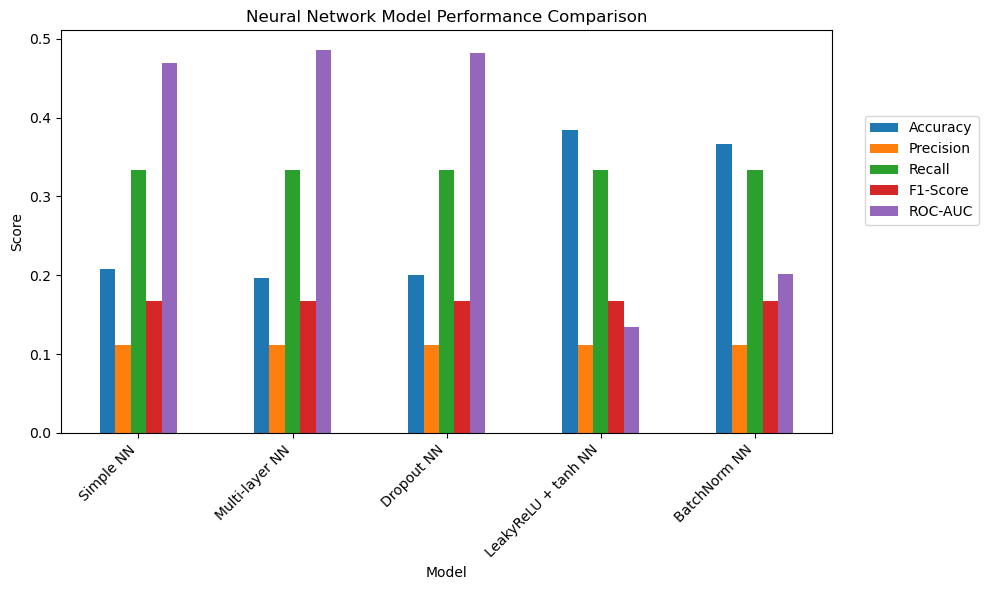

In [37]:
# Plot each metric for comparison
results_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Neural Network Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0.5))
plt.tight_layout()

# Show the plot
plt.savefig("DL Comparison")
plt.show()

##### - Learning curves for Machine Learning Models

Learning curve saved as: learning_curve_Logistic_Regression.png


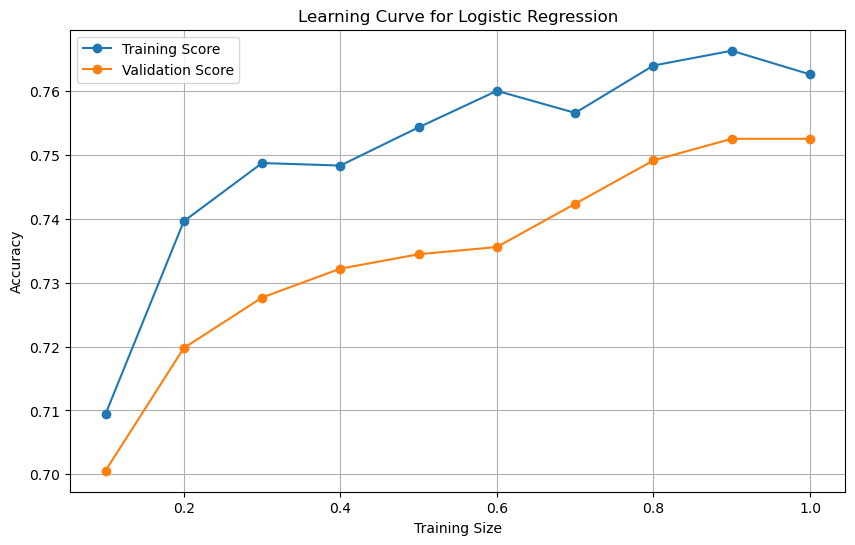

Learning curve saved as: learning_curve_Decision_Tree.png


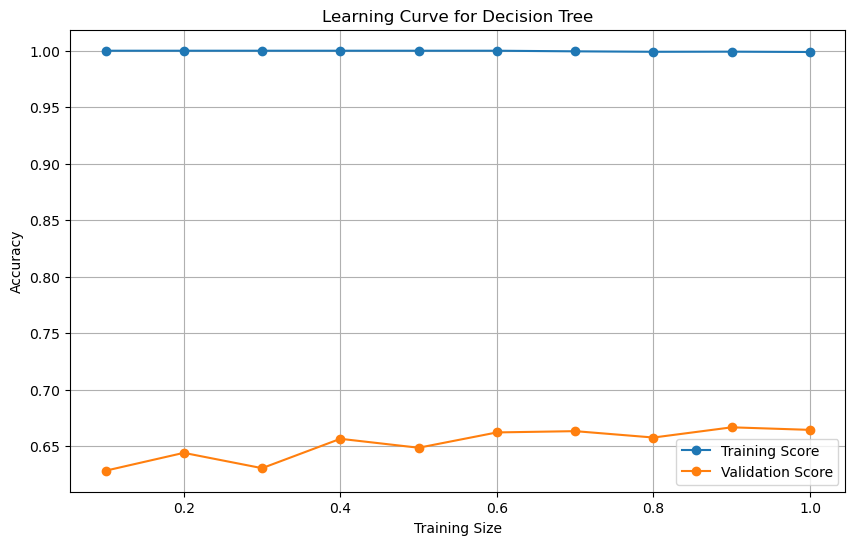

Learning curve saved as: learning_curve_Random_Forest.png


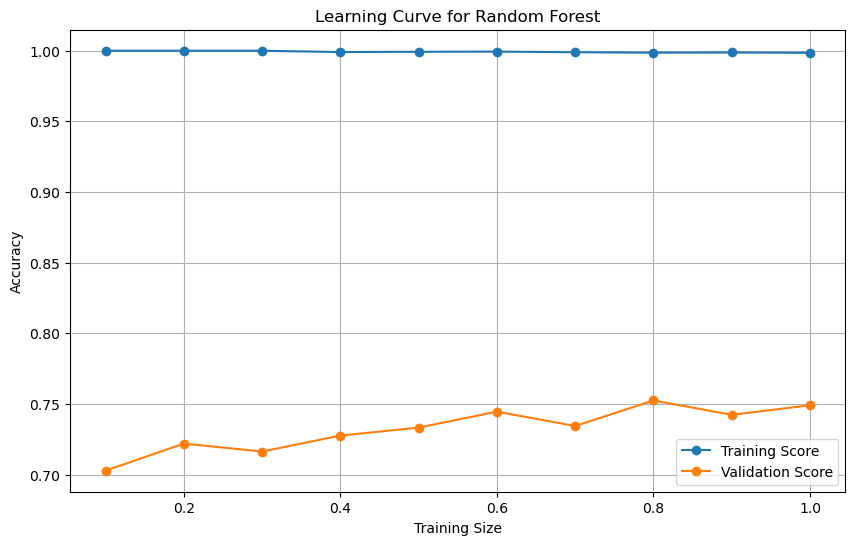

Learning curve saved as: learning_curve_Support_Vector_Machine.png


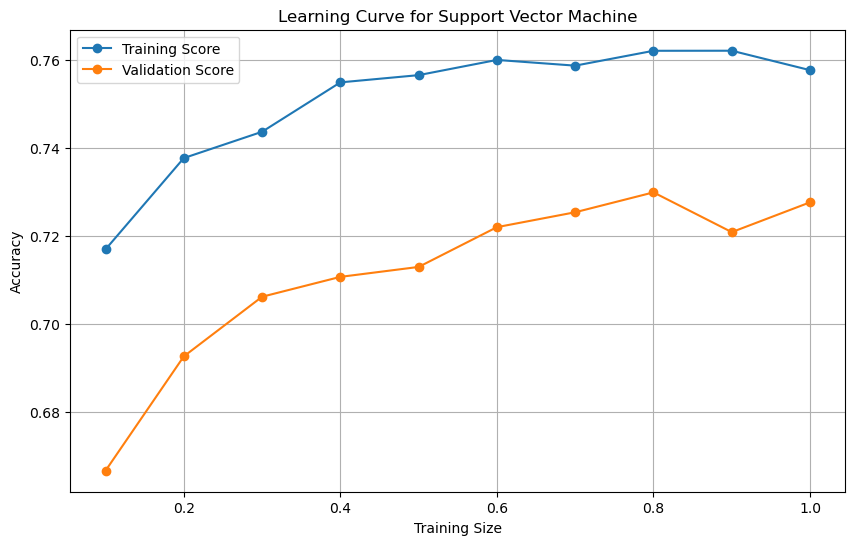

Learning curve saved as: learning_curve_XGBoost.png


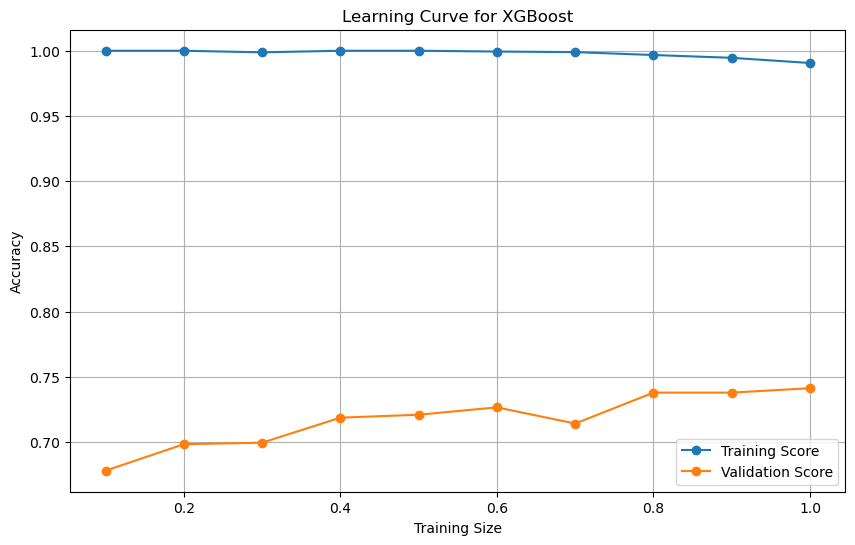

In [38]:
# Encoding target variables
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

def learning_curve(model, X_train, y_train, X_val, y_val, model_name):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores = []
    validation_scores = []

    for size in train_sizes:
        X_subset = X_train[:int(size * len(X_train))]
        y_subset = y_train[:int(size * len(y_train))]
        
        model.fit(X_subset, y_subset)
        
        # Get the accuracy for the current subset
        train_accuracy = accuracy_score(y_subset, model.predict(X_subset))
        val_accuracy = accuracy_score(y_val, model.predict(X_val))

        train_scores.append(train_accuracy)   # Append single score
        validation_scores.append(val_accuracy) # Append single score

    train_scores = np.array(train_scores)
    validation_scores = np.array(validation_scores)

    plot_learning_curves(train_sizes, train_scores, validation_scores, model_name)

def plot_learning_curves(train_sizes, train_scores, validation_scores, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores, label='Training Score', marker='o')
    plt.plot(train_sizes, validation_scores, label='Validation Score', marker='o')
    
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # Create a unique filename for each model's learning curve
    filename = f'learning_curve_{model_name.replace(" ", "_")}.png'  # Replace spaces with underscores
    plt.savefig(filename)  # Save the plot as a PNG file with a unique name
    print(f"Learning curve saved as: {filename}")  # Print a message confirming the save

    plt.show()  # Display the plot

    plt.close()  # Close the figure to free memory

# Define your machine learning models
ml_models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Support Vector Machine": svm_model,
    "XGBoost": XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train_encoded)))
}

# Call the learning_curve function for each machine learning model
for name, model in ml_models.items():
    learning_curve(model, X_train, y_train_encoded, X_val, y_val_encoded, name) 


##### - Learning curves for Deep Learning Models

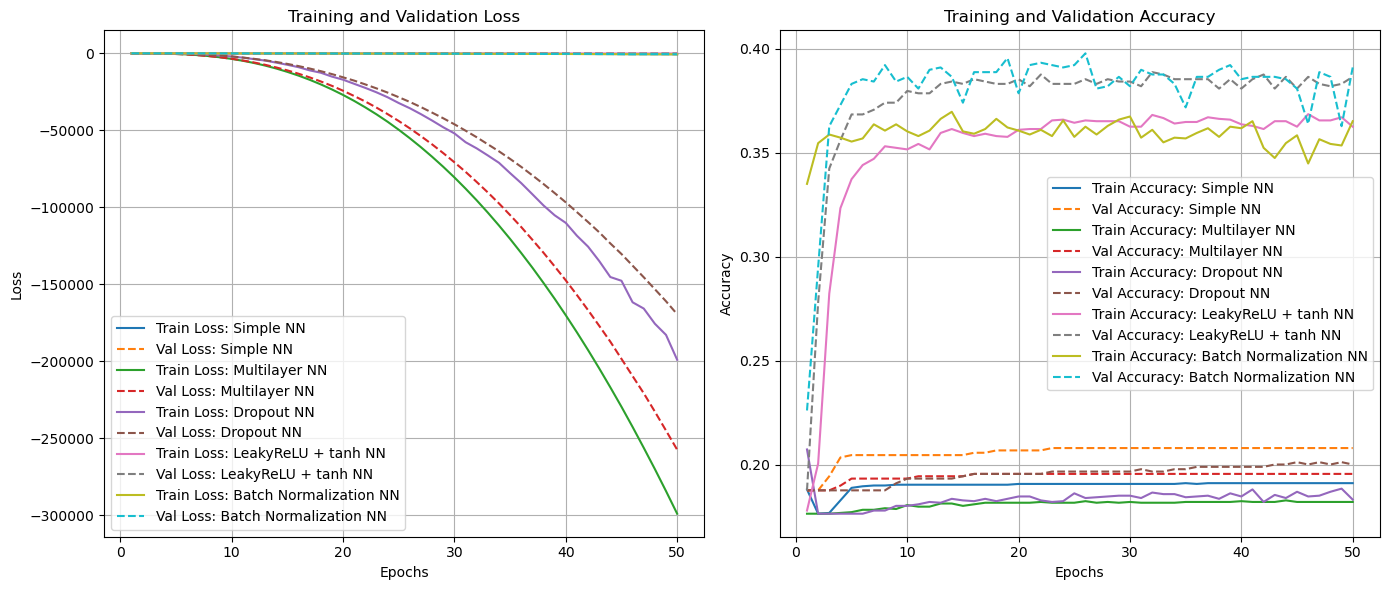

In [39]:
# Create a dictionary to hold the histories
history_dict = {
    "Simple NN": history_sl,
    "Multilayer NN": history_ml,
    "Dropout NN": history_nd,
    "LeakyReLU + tanh NN": history_na,
    "Batch Normalization NN": history_nb,
}

# Function to plot learning curves
def plot_learning_curves(history_dict):
    plt.figure(figsize=(14, 6))
    
    for name, history in history_dict.items():
        # Extract loss and accuracy from history
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        accuracy = history.history['accuracy']
        val_accuracy = history.history['val_accuracy']
        epochs = range(1, len(loss) + 1)

        # Plot training and validation loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs, loss, label=f'Train Loss: {name}')
        plt.plot(epochs, val_loss, label=f'Val Loss: {name}', linestyle='--')

        # Plot training and validation accuracy
        plt.subplot(1, 2, 2)
        plt.plot(epochs, accuracy, label=f'Train Accuracy: {name}')
        plt.plot(epochs, val_accuracy, label=f'Val Accuracy: {name}', linestyle='--')

    # Configure loss plot
    plt.subplot(1, 2, 1)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Configure accuracy plot
    plt.subplot(1, 2, 2)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.savefig('learning_curves_dl.png')
    plt.show()

# Call the function to plot learning curves
plot_learning_curves(history_dict)


In [40]:
import pickle

In [41]:
# Save models using pickle
for model_name, model in ml_models.items():
    with open(f'{model_name}.pkl', 'wb') as file:
        pickle.dump(model, file)

# Load models back into a new dictionary
loaded_models = {}
for model_name in ml_models.keys():
    with open(f'{model_name}.pkl', 'rb') as file:
        loaded_models[model_name] = pickle.load(file)

In [42]:
dl_models = {
    "Simple NN": sl_model,
    "Multilayer NN": ml_model,
    "Dropout NN": nd_model,
    "LeakyReLU + tanh NN": na_model,
    "Batch Normalization NN": nb_model,
}

In [43]:
# Save models using pickle
for model_name, model in dl_models.items():
    with open(f'{model_name}.pkl', 'wb') as file:
        pickle.dump(model, file)

# Load models back into a new dictionary
loaded_models = {}
for model_name in dl_models.keys():
    with open(f'{model_name}.pkl', 'rb') as file:
        loaded_models[model_name] = pickle.load(file)